**Using this template**

1. Change notebook title to assignment title you working on, eg. `Graded Challenge 1 or Milestone 1`
2. Put your identity such as name and batch number below notebook title.
3. Write your description before do any work. State your purpose of this assignment and what you are trying to achieve. 
4. Look at the rubric of this assignment and make sure you understand the criteria.
5. Code your solution in the cell provided below the working area section.
6. State your conlusions, findings, and any other relevant information in the cell provided below the conclusions sections.
7. Save this notebook and rename it to assignment title you working on  eg. `Graded Challenge 1 or Milestone 1`
8. Push your assignment before deadline.
9. Good Luck!

# Notebook Title

Milestone 1

Name: Gusti Ayu Dewi Puspa Kartikasari

Batch: 012

URL heroku: https://gusti-ayu-dewi-p-ftds-012-p0m1.herokuapp.com/

## Description

### Objective
Mencari point dan mengerjakan step yang disebutkan dalam problem statement.

### Problem Statement

CEO toko online "The Look" mencurigai bahwa ada yang tidak beres dari sistem penjualan di tokonya, dari performa penjualan produk, pengiriman barang, dsb. Mohon bantu ungkapkan apakah bermasalah atau tidak dari sistem penjualan di platformnya. Gunakan dataset thelook_ecommerce di Google Cloud Platform BigQuery.

SCOPE:

Permasalahan yang akan diangkat:
-Descriptive statistics:

Category produk apa saja yang paling banyak terjual dan produk apa yang masih banyak inventorynya?

Dimana distribution center produk tersebut dan pengirimannya kemana?

Distribution center mana yang menghandle penjualan terbanyak?

Rata-rata usia pembeli The Look

Category barang apa yang paling banyak di return?


-Inferential statitics
Bagaimana penjualan barang dan tingkat pengembalian barang the look berdasarkan gender?

NOTES: the data scope taken is from 2019 until 2021, selling trend change since covid-19 and 2022 is still ongoing 

## Working Area

```txt
Put your code, analysis, everything below this line

Make sure to check everything the rubric requires before you submit
```

Querry code:

a. df_inventory
SELECT product_id,sold_at,product_category, product_department,product_department
FROM bigquery-public-data.thelook_ecommerce.inventory_items
WHERE created_at BETWEEN '2019-01-01' AND '2021-12-31';

b. dfgender_return
SELECT status,gender, num_of_item
FROM bigquery-public-data.thelook_ecommerce.orders
WHERE created_at BETWEEN '2019-01-01' AND '2021-12-31'
AND num_of_item IS NOT NULL;

c. dfreturn_category
select orders.order_id,orders.status, inventory.product_category
from `bigquery-public-data.thelook_ecommerce.order_items` as orders
join `bigquery-public-data.thelook_ecommerce.inventory_items` as inventory on orders.inventory_item_id = inventory.id
WHERE orders.created_at BETWEEN '2019-01-01' AND '2021-12-31'

d. df_user
select orders.user_id, users.age, users.gender,users.country, orders.status,orders.num_of_item
from `bigquery-public-data.thelook_ecommerce.orders` as orders
join `bigquery-public-data.thelook_ecommerce.users` as users on orders.user_id = users.id
WHERE orders.created_at BETWEEN '2019-01-01' AND '2021-12-31';

e.df_distribution
select orders.inventory_item_id, dist.name, users.country,users.latitude,users.longitude
from `bigquery-public-data.thelook_ecommerce.users` as users
join `bigquery-public-data.thelook_ecommerce.order_items` as orders on users.id = orders.user_id
join `bigquery-public-data.thelook_ecommerce.inventory_items` as inventories on orders.inventory_item_id = inventories.id
join `bigquery-public-data.thelook_ecommerce.distribution_centers` as dist on inventories.product_distribution_center_id = dist.id
WHERE orders.created_at BETWEEN '2019-01-01' AND '2021-12-31';

addition: dfinv_created
SELECT product_id,created_at,product_category, product_department,product_department
FROM bigquery-public-data.thelook_ecommerce.inventory_items
WHERE created_at BETWEEN '2019-01-01' AND '2021-12-31';

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

### Case 1 : Category produk apa saja yang paling banyak terjual dan produk apa yang masih banyak inventorynya?

In [2]:
df_inventory = pd.read_csv(r'inv.csv')
df_inventory.head(3)

,product_id,sold_at,product_category,product_department,product_department_1
0,16898,2021-07-25 22:59:37 UTC,Tops & Tees,Men,Men
1,16898,NaN,Tops & Tees,Men,Men
2,16898,NaN,Tops & Tees,Men,Men


Note: Data ini belum siap dikarenakan bagi data inventory yang belum terjual hanya terindikasi dari sold_at yang bernilai NaN, sehingg perlu adanya pengolahan lebih lanjut dengan pemberian keterangan yang dapat membedakan kedua kategori ini

### generating nan to 'inventory item' and non-nan data to 'sold item'

In [3]:
df_invstat = df_inventory.copy()

In [4]:
item_status = []

for i in df_inventory.index:
    if pd.isna(df_inventory.iloc[i , 1]) == True:
        item_status.append('Inventory item')
    else:
        item_status.append('Sold item')

df_inventory['item_status'] = item_status
df_inventory.head(3)

,product_id,sold_at,product_category,product_department,product_department_1,item_status
0,16898,2021-07-25 22:59:37 UTC,Tops & Tees,Men,Men,Sold item
1,16898,NaN,Tops & Tees,Men,Men,Inventory item
2,16898,NaN,Tops & Tees,Men,Men,Inventory item


In [5]:
df_invitem = df_inventory[df_inventory['item_status'] == "Inventory item"]
df_invitem = df_invitem.groupby(["product_category"])[['item_status']].count()
#df_invitem.iloc[1,0]

df_solditem = df_inventory[df_inventory['item_status'] == "Sold item"]
df_solditem = df_solditem.groupby(["product_category"])[['item_status']].count()
df_allitem = df_inventory.groupby(["product_category"])[['product_category']].count()

Pengelompokan data berdasarkan status

In [6]:
pd.DataFrame(df_allitem)
df_allitem['inventory'] = df_invitem.loc[:,'item_status']
df_allitem['sold'] = df_solditem.loc[:,'item_status']
df_allitem = df_allitem.rename(columns ={'product_category':'total_item'})
df_allitem = df_allitem.sort_values(by="total_item", ascending=False)
df_allitem.head(5)

,total_item,inventory,sold
product_category,,,
Intimates,26888,18298,8590
Jeans,25785,17630,8155
Fashion Hoodies & Sweatshirts,24196,16592,7604
Tops & Tees,24077,16466,7611
Swim,23233,15887,7346


Tabel diatas adalah tabel dengan data inventory item (unsold item) dan sold item yang telah ditambahkan

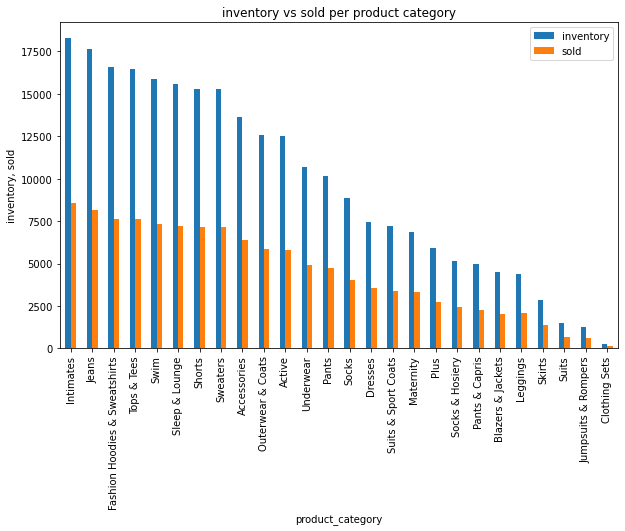

In [7]:
df_allitem_plot = df_allitem.drop(columns=['total_item'])
df_allitem_plot.plot(kind='bar', figsize=(10, 6))

plt.xlabel('product_category') # add to x-label to the plot
plt.ylabel('inventory, sold') # add y-label to the plot
plt.title('inventory vs sold per product category') # add title to the plot

plt.show()

Diagram diatas menunjukkan jumlah inventory dan barang yang sudah terjual dari yang paling besar hingga kecil, dapat terlihat bahwa terjadi overstock ditandai dengan adanya penumpukan inventory hingga 2x lipat sold item. Oleh karena itu perlu adanya rekomendasi jumlah created inventory perbulan dengan menghitung confidence interval sebagai acuan dengan confidence level = 95%

Mencari confidence interval bagi category dengan quantity inventory dan sold item terbesar sebagai acuan

In [8]:
df_invstat=df_invstat.dropna()

In [9]:
df_invstat['month'] = pd.DatetimeIndex(df_invstat['sold_at']).month
df_invstat['year'] = pd.DatetimeIndex(df_invstat['sold_at']).year

In [10]:
data_CIintimates = df_invstat[df_invstat['product_category'] == "Intimates"].groupby(["year","month"])[["product_category"]].count()
data_CIintimates=data_CIintimates.reset_index()
ci = np.round(stats.norm.interval(0.95,data_CIintimates.product_category.mean(), data_CIintimates.product_category.std()),0)
ci[1]

569.0

Dari confidence interval category Intimates, didapatkan bahwa created inventory perbulan yang direkomendasikan adalah 569 pcs. Mari hitung data yang terjadi sebenarnya.

In [11]:
df_created = pd.read_csv(r'createdat.csv')
df_created.head(3)

,product_id,created_at,product_category,product_department,product_department_1
0,16898,2021-07-09 10:32:00 UTC,Tops & Tees,Men,Men
1,16898,2021-01-17 05:10:00 UTC,Tops & Tees,Men,Men
2,16898,2020-09-28 18:33:14 UTC,Tops & Tees,Men,Men


In [12]:
df_created['month'] = pd.DatetimeIndex(df_created['created_at']).month
df_created['year'] = pd.DatetimeIndex(df_created['created_at']).year

In [13]:
dfmean_created = df_created[df_created['product_category'] == "Intimates"].groupby(["year","month"])[["product_category"]].count()
dfmean_created=dfmean_created.reset_index()
np.round(dfmean_created.product_category.mean(),0)

757.0

rata-rata aktual created inventory perbulan yang terjadi sebesar 757 pcs. Jumlah ini 33% lebih besar daripada jumlah yang dianjurkan. Dapat disimpulkan terjadinya overstock dikarenakan item yang di stok lebih besar dan hal ini terakumulasi berbulan-bulan.

## Case 2: Bagaimana penjualan barang dan tingkat pengembalian barang the look berdasarkan gender? 

In [14]:
dfgender_return = pd.read_csv(r'return_gender.csv')
dfgender_return.head(5)

,status,gender,num_of_item
0,Shipped,F,1
1,Shipped,F,4
2,Shipped,F,1
3,Shipped,F,1
4,Shipped,F,1


In [15]:
# dfreturn = dfgender_return[dfgender_return['status'] == "Returned"].groupby(["gender"])[["num_of_item"]].sum()
# dfreturn_all = dfgender_return.groupby(["gender"])[["num_of_item"]].sum()
# dfreturn.loc['F','num_of_item'] = dfreturn.loc['F','num_of_item']/dfreturn_all.loc['F','num_of_item']*100
# dfreturn.loc['M','num_of_item'] = dfreturn.loc['M','num_of_item']/dfreturn_all.loc['M','num_of_item']*100
# dfreturn = dfreturn.rename(columns ={'num_of_item':'return_percentage'})
# dfreturn

Di grup berdasarkan gender, lalu hitung jumlah number of item kemudian hitung persentase barang return, complete dan shipped

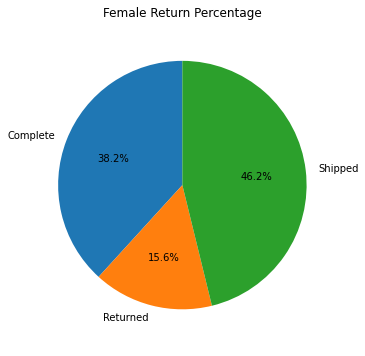

In [16]:
dfreturnF = dfgender_return[dfgender_return['gender'] == "F"].groupby(["status"])[["num_of_item"]].sum()
dfreturnF = dfreturnF.drop(['Cancelled','Processing'],axis = 0)

dfreturnF.iloc[:,0].plot(kind='pie', figsize=(5, 6), autopct='%1.1f%%', startangle=90, shadow=False)      

plt.title('Female Return Percentage')
plt.ylabel('')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

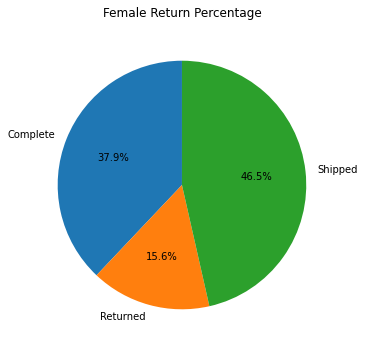

In [17]:
dfreturnM = dfgender_return[dfgender_return['gender'] == "M"].groupby(["status"])[["num_of_item"]].sum()
dfreturnM = dfreturnM.drop(['Cancelled','Processing'],axis = 0)

dfreturnM.iloc[:,0].plot(kind='pie', figsize=(5, 6), autopct='%1.1f%%', startangle=90, shadow=False)      

plt.title('Female Return Percentage')
plt.ylabel('')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

Dari kedua piechart, persentase barang complete, shipped dan returned dari kedua gender hampir sama. Namun terdapat insight lain yang dapat dilihat dari chart ini, bahwa terdapat sekitar 15% atau 15 dari 100 barang terkirim yang dikembalikan. Hal ini cukup tinggi, karena bisa diartikan bahwa dari 100 pelanggan terdapat 15 pelanggan yang tidak puas dengan produk tersebut. Perlu adanya peninjauan lebih lanjut mengenai alasan mengapa barang ini dikembalikan karena tingginya tingkat pengembalian barang tentu akan berdampak pada keuangan perusahaan dan juga kepuasan pelanggan.

In [18]:
#dfreturn.loc[("F", "Returned"), 'num_of_item']

## Case 3: Category barang apa yang paling banyak di return?

Setelah mengetahui tingginya tingkat pengembalian barang, maka hal ini akan dianalisa lebih dalam. Dalam hal ini analisa akan dilanjutkan untuk mengetahui kategori produk yang paling banyak dikembalikan oleh pelanggan.

In [19]:
dfcategory_return = pd.read_csv(r'return_category.csv')
dfcategory_return.head(5)

,order_id,status,product_category
0,94921,Shipped,Clothing Sets
1,50015,Complete,Clothing Sets
2,65128,Returned,Clothing Sets
3,74635,Processing,Clothing Sets
4,124469,Complete,Clothing Sets


mencari data dengan status 'returned'

In [20]:
dfcatret = dfcategory_return[dfcategory_return['status'] == "Returned"].groupby(["product_category"])[["product_category"]].count()
allsum = dfcatret.loc[:,'product_category'].sum()
for i in dfcatret.index:
    dfcatret.loc[i,'product_category'] = np.round(dfcatret.loc[i,'product_category']/allsum*100,2)

dfcatret = dfcatret.rename(columns ={'product_category':'return_percentage'})
dfcatret = dfcatret.sort_values(by='return_percentage', ascending=False)

Mengelompokkan row 11-akhir mkedalam 'Others' untuk mengefektifkan visualisasi dan analisa

In [21]:
others = dfcatret.iloc[11:,0].sum()
dfcatret_plot = dfcatret.copy()
dfcatret_plot.iloc[11,0] = others
dfcatret_plot = dfcatret_plot.rename(index={dfcatret_plot.index[11]: "Others (14 other categories)"})

dfcatret_plot = dfcatret_plot.drop(dfcatret_plot.index[12:], axis=0 )
dfcatret_plot


,return_percentage
product_category,
Intimates,7.33
Jeans,6.81
Shorts,6.53
Tops & Tees,6.32
Fashion Hoodies & Sweatshirts,6.32
Sleep & Lounge,6.24
Swim,6.18
Sweaters,5.65
Accessories,5.42


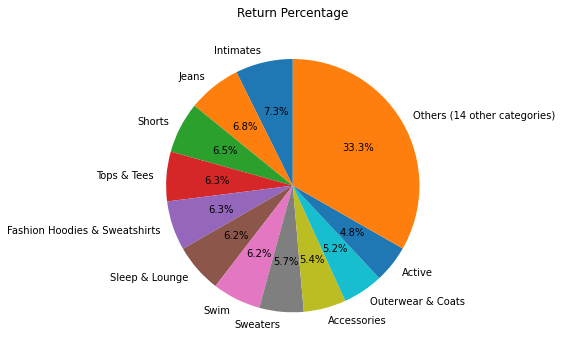

In [22]:
dfcatret_plot.loc[:,'return_percentage'].plot(kind='pie', figsize=(5, 6), autopct='%1.1f%%', startangle=90, shadow=False)      

plt.title('Return Percentage')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.ylabel('')

plt.show()

Pie chart diatas dapat membantu untuk memfokuskan pencharian akar masalah tingginya barang yang dikembalikan oleh pelanggan. Pencarian dapat dimulai dari kategori intimates, jeans, dan shorts karena jumlah % telah melewati 20% jika mengikuti pareto principle bahwa 80% masalah disebabkan oleh 20% akar permasalahan, sehingga disarankan untuk berfokus kepada 3 kategori berikut.

## Case 4: Rata-rata usia pembeli The Look


Menganalisa target marketing the look untuk menyesuaikan spesifikasi mayoritas produk.

In [23]:
df_user = pd.read_csv(r'user_country_age.csv')
df_user.head(5)

,user_id,age,gender,country,status,num_of_item
0,349,12,F,United Kingdom,Shipped,2
1,420,12,F,Brasil,Shipped,1
2,501,12,F,China,Shipped,1
3,501,12,F,China,Shipped,2
4,1617,12,F,United States,Shipped,1


In [24]:
# dffemaleuser = df_user[df_user['gender'] == "M"].groupby(["gender","age"])[["num_of_item"]].sum().sort_values(by='num_of_item', ascending=False).head(10)
# dffemaleuser

In [25]:
female = df_user[df_user['gender'] == 'F']
male = df_user[df_user['gender'] == 'M']

Mengelompokkan data berdasarkan gender Female dan Male lalu hitung rata-rata, dan modus, serta nilai tengahnya.
Namun data yang dimiliki tidak memadai untuk dilakukan perhitungan terhadap frekuensi usia, sehingga perlu dibuat data frame baru.

In [26]:
import statistics

female_data = []
for i in female.index:
    b = female.loc[i,'num_of_item']
    age = female.loc[i,'age']

    while b > 0 :
        female_data.append(age)
        b = b - 1

female_age = pd.DataFrame()
female_age['age'] = female_data

female_age

print('rata-rata usia: ', female_age.age.mean(), '; modus: ' , statistics.mode(female_age.age), '; nilai tengah: ', female_age.age.median())

rata-rata usia:  40.964153574416656 ; modus:  22 ; nilai tengah:  41.0


In [27]:
male_data = []
for i in male.index:
    b = male.loc[i,'num_of_item']
    age = male.loc[i,'age']

    while b > 0 :
        male_data.append(age)
        b = b - 1

male_age = pd.DataFrame()
male_age['age'] = male_data

male_age

print('rata-rata usia: ', male_age.age.mean(), '; modus: ' , statistics.mode(male_age.age), ';nilai tengah: ', female_age.age.median())

rata-rata usia:  41.05577371911236 ; modus:  54 ;nilai tengah:  41.0


Dari perhitungan ini dapat diketahui bahwa rata-rata usia pelanggan wanita yaitu 40.9 dengan pembelian terbanyak dilakukan oleh pelanggan berusia 22 dan nilai tengah dari usia pelanggan wanita yaitu 41. Sedangkan pada pria, rata-rata usia pelanggan yakni 41.06 dengan pembelian terbanyak dilakukan oleh pelanggan berusia 54 dan nilai tengah usia pelanggan yakni 41. Hasil pengolahan data ini menunjukkna bahwa segmen usia pada wanita yaitu berkisar pada usia 22 dan pada pria pada usia 54. 

## Case 5: Bagaimana pembebanan shipping bagi setiap distribution center?

Pada case ini, analisa dilakukan untuk mendalami pembebanan pengiriman bagi setiap distribution center.

In [28]:
df_distribution = pd.read_csv(r'distribution_center.csv')
df_distribution.head(5)

,inventory_item_id,name,country,latitude,longitude
0,216949,Mobile AL,Japan,34.851814,136.508713
1,402710,Port Authority of New York/New Jersey NY/NJ,Japan,34.851814,136.508713
2,402706,Philadelphia PA,Japan,34.851814,136.508713
3,402714,Chicago IL,Japan,34.851814,136.508713
4,113939,Memphis TN,Brasil,-9.945568,-67.835610


Data di kelompokkan berdasarkan negara.

In [29]:
df_selldist = df_distribution.groupby(["name"])[["country"]].count().sort_values(by='country', ascending=False)
df_selldist = df_selldist.rename(columns ={'country':'total_shipping'})
df_selldist.head(10)

,total_shipping
name,
Memphis TN,14412
Chicago IL,14183
Houston TX,13337
Mobile AL,10870
Los Angeles CA,10320
Philadelphia PA,9978
Charleston SC,9962
Port Authority of New York/New Jersey NY/NJ,9772
New Orleans LA,7668


Lalu di plot kedalam pie chart untuk mengetahui perbedaan pembebanan shipping dalam bentuk persentase.

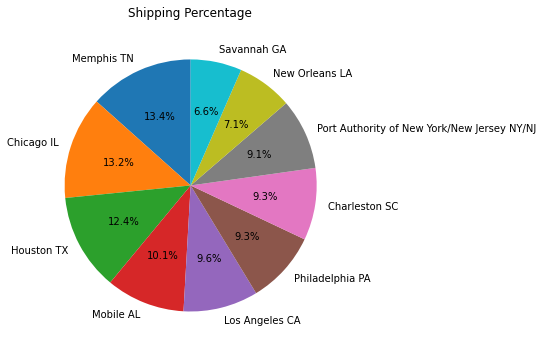

In [30]:
df_selldist.loc[:,'total_shipping'].plot(kind='pie', figsize=(5, 6), autopct='%1.1f%%', startangle=90, shadow=False)      

plt.title('Shipping Percentage')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.ylabel('')
plt.show()

Dari pie chart ini, terlihat adanya ketidak merataan pembebanan pengiriman antar distribution center. Dimana pembebanan terendah dimiliki Savannah GA yaitu 6.6% dan yang tertinggi Memphis TN dengan 13.4%. Pembebanan Memphis TN mencapai 2x lipat Savannah GA, perlu dianalisa apakah kapasitas distribution center tersebut memadai untuk menangani pembebanan ini. Apabila kapasitas kedua distribution center ini sama maka disarankan untuk melakukan penyesuaian kapasitas.

## Case 6: Cari top 3 distribution center dengan beban tertinggi dan berapa banyak shipping per negara yang di handle?


Menganalisa shipping negara yang dihandle oleh 3 distribution center dengan beban tertinggi untuk mengetahui negara dengan shipping terbanyak per distribution site tersebut.

Dimulai dari mengumpulkan data dari site Memphis TN, dan mencari 8 negara teratas. Sisanya dikelompokkan menjadi other country untuk menyederhanakan analisa.

In [31]:
df_countdistMT = df_distribution[df_distribution['name']=='Memphis TN'].groupby(["country"])[["country"]].count().sort_values(by='country', ascending=False)

others = df_countdistMT.iloc[8:,0].sum()
df_countdistMT.iloc[8,0] = others
df_countdistMT = df_countdistMT.rename(index={df_countdistMT.index[8]: "Other country"})

df_countdistMT = df_countdistMT.drop(df_countdistMT.index[9:], axis=0 )
df_countdistMT


df_countdistMT.loc[:,'country'].plot(kind='pie', figsize=(5, 6), autopct='%1.1f%%', startangle=90, shadow=False)      

plt.title('Shipping Percentage')
plt.axis('equal') 

plt.show()

ValueError: 'country' is both an index level and a column label, which is ambiguous.

other country = Japan,Australia,Belgium, Poland, Colombia

Negara dengan shipping tertinggi bagi Memphis TN yakni China, United States dan Brasil.
lanjutkan analisa ke Chicage IL

c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'country' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


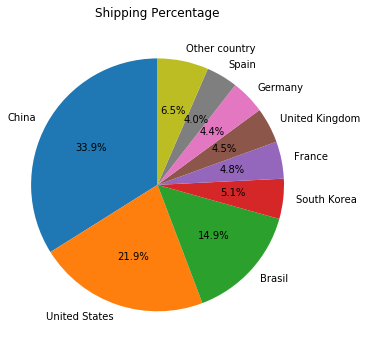

In [ ]:
df_countdistCI = df_distribution[df_distribution['name']=='Chicago IL'].groupby(["country"])[["country"]].count().sort_values(by='country', ascending=False)

others = df_countdistCI.iloc[8:,0].sum()
df_countdistCI.iloc[8,0] = others
df_countdistCI = df_countdistCI.rename(index={df_countdistCI.index[8]: "Other country"})

df_countdistCI = df_countdistCI.drop(df_countdistCI.index[9:], axis=0 )
df_countdistCI


df_countdistCI.loc[:,'country'].plot(kind='pie', figsize=(5, 6), autopct='%1.1f%%', startangle=90, shadow=False)      

plt.title('Shipping Percentage')
plt.axis('equal')
plt.ylabel('')

plt.show()

other country = Japan,Australia,Belgium, Poland

Negara dengan shipping tertinggi bagi Chicago IL yakni China, United States dan Brasil.
lanjutkan analisa ke Huoston TX

c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'country' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


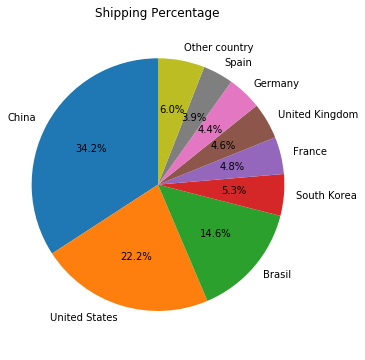

In [ ]:
df_countdistHT = df_distribution[df_distribution['name']=='Houston TX'].groupby(["country"])[["country"]].count().sort_values(by='country', ascending=False)

others = df_countdistHT.iloc[8:,0].sum()
df_countdistHT.iloc[8,0] = others
df_countdistHT = df_countdistHT.rename(index={df_countdistHT.index[8]: "Other country"})

df_countdistHT = df_countdistHT.drop(df_countdistHT.index[9:], axis=0 )
df_countdistHT


df_countdistHT.loc[:,'country'].plot(kind='pie', figsize=(5, 6), autopct='%1.1f%%', startangle=90, shadow=False)      

plt.title('Shipping Percentage')
plt.axis('equal') 
plt.ylabel('')
plt.show()

other country = Japan,Australia,Belgium,Poland

Negara dengan shipping tertinggi bagi Houston TX yakni China, United States dan Brasil.

Negara yang dominan pada ketiga distribution center ini adalah China, United States, dan Brazil.
Dimana dari data ini dapat disimpilkan bahwa permintaan dari ketiga negara ini sangat tinggi, apabila terdapat kemungkinan penyesuaian kapasitas maka disarankan untuk meningkatkan kapasitas pada distribution center yang berada pada sekitar 3 negara ini.

## Conclusions, Assumptions, Overall Analysis

Dari analisa-analisa diatas terdapat beberapa point yang perlu menjadi perhatian management
1. adanya overstock, perbedaan yang besar antara inventory dan sold item.
2. tingginya returned item, management dapat berfokus pada kategori Intimate, Jeans dan shorts.
3. penyesuian produk spesifikasi terhadap usia mayoritas pelanggan yakni 22 bagi wanita dan 54 bagi pria.
4. terlihat adanya ketidak merataan pembebanan pengiriman antar distribution center. Dimana pembebanan terendah dimiliki Savannah GA yaitu 6.6% dan yang tertinggi Memphis TN dengan 13.4%.

Kemudian terdapat saran apabila management berencana membangin distribution center baru yakni membangun distribution center yang berada pada sekitar China, United States, dan Brazil